In [3]:
from typing import Optional, Callable, Union
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

from utils import ErdosRenyiNetwork
# https://barabasi.com/f/622.pdf

        
# if isinstance(w,(float,int)): adj = np.full((n,n),w)
# else                        : adj = w(size=(n,n),**args)
# 
# mask  = p < np.random.rand(n,n)
# adj   = np.where(mask,0,adj)
# 
# if not self.__loop    : np.fill_diagonal(adj, 0)
# if not self.__directed: adj = np.triu(adj) + np.triu(adj,1).T
# return adj

In [10]:
def plot(adj):
    nrow, ncol = adj.shape
    rows, cols = np.where(adj != 0)

    nodes = [f'n{num}' for num in range(nrow)]
    edges = [(nodes[i], nodes[j]) for (i, j) in zip(rows, cols)]

    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
        
    degs = [d for (n, d) in sorted(G.degree(), key=lambda arg:-arg[1])]    
    fig  = plt.figure("Degree of a random graph", figsize=(8, 8))
    grid = fig.add_gridspec(3, 3)
    
    ax0  = fig.add_subplot(grid[0:2,:])    
    pos  = nx.spring_layout(G)
    nopt = {"node_color":"red","node_size":30}
    eopt = {"edge_color":"black","width": 0.75,"alpha":0.85}
    nx.draw_networkx_nodes(G, pos, ax=ax0, **nopt)
    nx.draw_networkx_edges(G, pos, ax=ax0, **eopt)
    ax0.set_title("Connected components of G")
    ax0.set_axis_off()
    
    ax1  = fig.add_subplot(grid[2:3,0])
    ax1.plot(degs, "b-.", marker="o")
    ax1.set_title("Degree Rank Plot")
    ax1.set_ylabel("Degree")
    ax1.set_xlabel("Rank")
    
    ax2  = fig.add_subplot(grid[2:3,1])
    ax2.matshow(adj,cmap="bone")
    ax2.set_title("Adjacency Matrix")
    ax2.set_axis_off()   
    
    ax3  = fig.add_subplot(grid[2:3,2])
    ax3.bar(*np.unique(degs, return_counts=True))
    ax3.set_title("Degree histogram")
    ax3.set_xlabel("Degree")
    ax3.set_ylabel("# of Nodes") 

    fig.tight_layout()
    plt.show()

In [16]:
ER   = ErdosRenyiNetwork()
BA   = BarabasiAlbertNetwork(3,3)

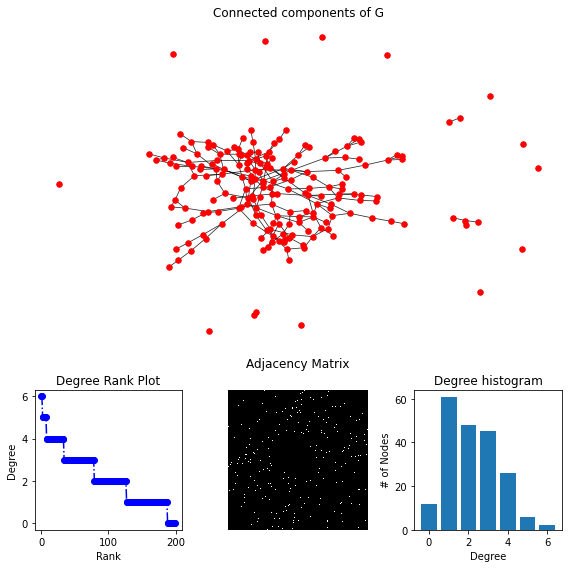

In [17]:
plot(ER(200,.01))

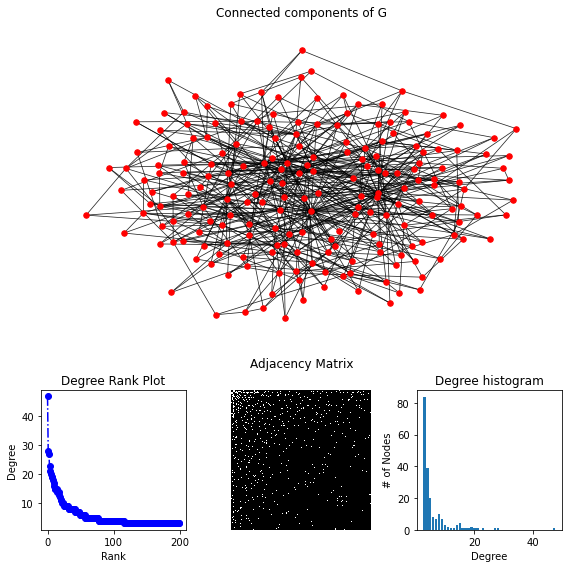

In [18]:
plot(BA(200))